In [29]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import numpy as np
import pandas as pd
import glob
import re
import os
import cv2
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision
import albumentations as A

In [78]:
from torchvision import transforms

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
path2img = "/media/brats/DRIVE1/akansh/lung-seg/data/images/"
path2mask = "/media/brats/DRIVE1/akansh/lung-seg/data/masks/"

In [197]:
train_transforms = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.Rotate((-30,30), p = 0.5),
    A.ElasticTransform(p=0.5, alpha=1, sigma=50, alpha_affine=10),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.3),
    A.GridDistortion(p=0.5),
    A.OpticalDistortion(distort_limit=0.8, shift_limit=0.6, p=1),
    A.RandomSizedCrop(min_max_height=(150, 200), height=224, width=224, p=0.5),
    A.CLAHE(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.RandomGamma(p = 0.5),
    A.Normalize()
        ])

test_transforms = A.Compose([
    A.Normalize()
        ])

In [198]:
class LungDataset(Dataset):
    
    def __init__(self, img_dir, mask_dir, transforms = None):
        
        self.img_dir = [os.path.join(img_dir,i) for i in os.listdir(img_dir) if i.endswith('png')]
        self.img_dir.sort()
        if mask_dir is not None:
            self.mask_dir = [os.path.join(mask_dir,i) for i in os.listdir(mask_dir) if i.endswith('png')]
            self.mask_dir.sort()
        self.transforms = transforms        
    def __len__(self):
        return len(self.img_dir)
    
    def __getitem__(self,idx):
        img = cv2.imread(self.img_dir[idx], cv2.IMREAD_GRAYSCALE)
        if self.mask_dir is not None:
            mask = cv2.imread(self.mask_dir[idx], cv2.IMREAD_GRAYSCALE)
            mask = np.clip(mask, 0, 1).astype("float32")
            augmented = self.transforms(image=img, mask=mask)
            img = augmented['image']
            mask = augmented['mask']
            return torch.tensor(img), torch.FloatTensor(mask)
        
        else:
            augmented = self.transforms(image=img)
            img = augmented['image']
            return torch.tensor(img)   

In [199]:
lung_data_1 = LungDataset(img_dir = path2img, mask_dir = path2mask, transforms = train_transforms)

In [200]:
for x, y in lung_data_1:
    print(x.shape)
    print(y)
    break

ValueError: operands could not be broadcast together with shapes (224,224) (3,) (224,224) 

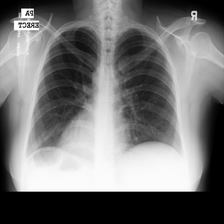

In [196]:
transforms.ToPILImage()(x)

In [179]:
img = cv2.imread(os.path.join(path2img,os.listdir(path2img)[0]),cv2.IMREAD_GRAYSCALE)

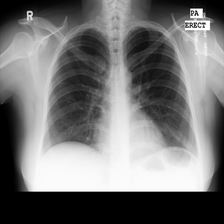

In [188]:
transforms.ToPILImage()(torch.tensor(img))

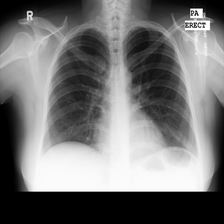

In [181]:
Image.fromarray(img)

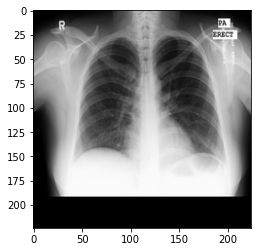

In [118]:
plt.imshow(img, cmap = 'gray')

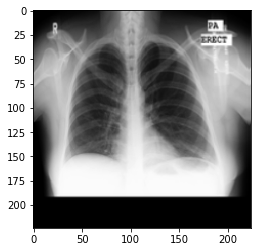

In [122]:
plt.imshow(train_transforms(image = img)['image'], cmap = 'gray')